### QED-C Prototype Benchmarks - Qiskit Version
The notebook contains a suite of prototype application benchmarks for the Qiskit API.
Configure and run the cell below with the desired execution settings.
Then execute the remaining cells, each containing one benchmark program.

In [4]:
min_qubits=2
max_qubits=4
max_circuits=3
num_shots=1000

backend_id="qasm_simulator"
hub="ibm-q"; group="open"; project="main"
provider_backend = None
exec_options = None

# # *** If using IBMQ hardware, run this once to authenticate
# from qiskit import IBMQ
# IBMQ.save_account('YOUR_API_TOKEN_HERE')

# # *** If you are part of an IBMQ group, set hub, group, and project name here
# hub="YOUR_HUB_NAME"
# group="YOUR_GROUP_NAME"
# project="YOUR_PROJECT_NAME"

# # *** This example shows how to specify the backend using a known "backend_id"
# # Use 'sabre' layout for IBM backends
# exec_options = { "optimization_level":3, "layout_method":'sabre', "routing_method":'sabre' }
# backend_id="ibmq_belem"

# # *** Here's an example of using a typical custom provider backend (e.g. AQT simulator)
# import os
# from qiskit_aqt_provider import AQTProvider
# provider = AQTProvider(os.environ.get('AQT_ACCESS_KEY'))    # get your key from environment
# provider_backend = provider.backends.aqt_qasm_simulator_noise_1
# backend_id="aqt_qasm_simulator_noise_1"

# # An example using IonQ provider
# from qiskit_ionq import IonQProvider
# provider = IonQProvider()   # Be sure to set the QISKIT_IONQ_API_TOKEN environment variable
# provider_backend = provider.get_backend("ionq_qpu")
# backend_id="ionq_qpu"


In [2]:
# Custom optimization options can be specified in this cell (below is an example)

# # Example of TrueQ Randomized Compilation
# import _common.transformers.trueq_rc as trueq_rc
# exec_options = { "optimization_level": 3, "layout_method":'sabre', "routing_method":'sabre', "transformer": trueq_rc.local_rc } 

# # Example of pytket Transformer
# import _common.transformers.tket_optimiser as tket_optimiser
# exec_options = { "optimization_level": 0, "layout_method":'sabre', "routing_method":'sabre', "transformer": tket_optimiser.high_optimisation }

# # Define a custom noise model to be used during execution
# import _common.custom.custom_qiskit_noise_model as custom_qiskit_noise_model
# exec_options = { "noise_model": custom_qiskit_noise_model.my_noise_model() }


### Hydrogen Lattice - Method 1

In [6]:
import sys
sys.path.insert(1, "hydrogen-lattice/qiskit")
import hydrogen_lattice_benchmark

# set noise to None for testing
import execute
execute.set_noise_model(None)

hydrogen_lattice_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=1, 
)

Hydrogen Lattice Benchmark Program - Qiskit
... execution starting at Jul 13, 2023 02:04:07 UTC
************
Executing [2] circuits for num_qubits = 2
************
Executing [2] circuits for num_qubits = 4


### Hydrogen Lattice - Method 2 - Degree 3 - Approximation Ratio as Objective Function

Hydrogen Lattice Benchmark Program - Qiskit
... execution starting at Jul 13, 2023 02:04:59 UTC
************
Executing [3] restarts for num_qubits = 2

Below Energies are for problem file h2_chain_0.75.json is for 2 qubits and radius 0.75 of paired hamiltionians
PUCCD calculated energy : -1.2979229855159067

Below Classical Energies are in solution file h2_chain_0.75.sol is 2 qubits and radius 0.75 of paired hamiltionians
DOCI calculated energy : -1.1371170673457314
FCI calculated energy : -1.1371170673457338


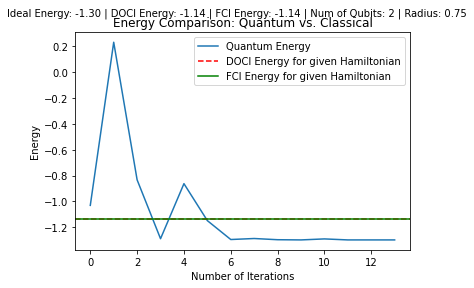


Below Energies are for problem file h2_chain_1.0.json is for 2 qubits and radius 1.0. of paired hamiltionians
PUCCD calculated energy : -1.2628992328034068

Below Classical Energies are in solution file h2_chain_1.0.sol is 2 qubits and radius 1.0. of paired hamiltionians
DOCI calculated energy : -1.101150330232619
FCI calculated energy : -1.1011503302326209


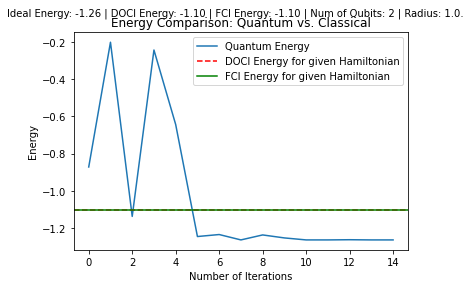


Below Energies are for problem file h2_chain_1.25.json is for 2 qubits and radius 1.25 of paired hamiltionians
PUCCD calculated energy : -1.2007268305794425

Below Classical Energies are in solution file h2_chain_1.25.sol is 2 qubits and radius 1.25 of paired hamiltionians
DOCI calculated energy : -1.0457831445498011
FCI calculated energy : -1.0457831445498003


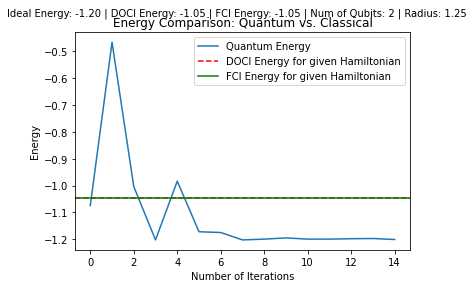

************
Executing [3] restarts for num_qubits = 4

Below Energies are for problem file h4_chain_0.75.json is for 4 qubits and radius 0.75 of paired hamiltionians
PUCCD calculated energy : -2.2275572369567547

Below Classical Energies are in solution file h4_chain_0.75.sol is 4 qubits and radius 0.75 of paired hamiltionians
DOCI calculated energy : -2.128804507986548
FCI calculated energy : -2.1451106471862036


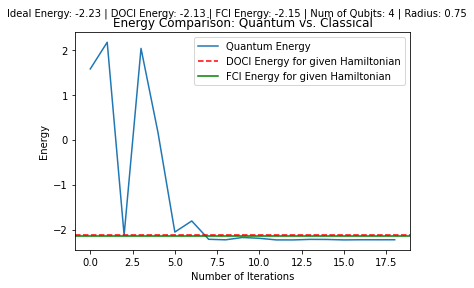


Below Energies are for problem file h4_chain_1.0.json is for 4 qubits and radius 1.0. of paired hamiltionians
PUCCD calculated energy : -2.225529060657429

Below Classical Energies are in solution file h4_chain_1.0.sol is 4 qubits and radius 1.0. of paired hamiltionians
DOCI calculated energy : -2.1339866470704902
FCI calculated energy : -2.1663874486347585


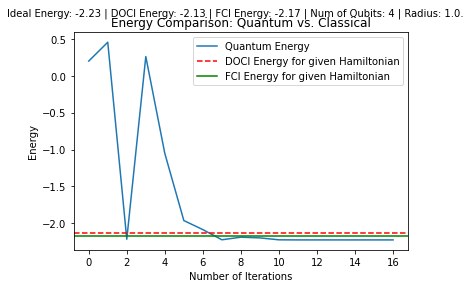


Below Energies are for problem file h4_chain_1.25.json is for 4 qubits and radius 1.25 of paired hamiltionians
PUCCD calculated energy : -2.1126270692228193

Below Classical Energies are in solution file h4_chain_1.25.sol is 4 qubits and radius 1.25 of paired hamiltionians
DOCI calculated energy : -2.0237608140951036
FCI calculated energy : -2.0839356356450756


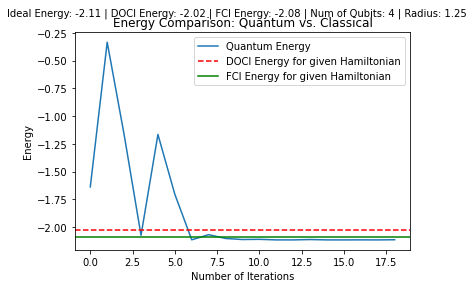

In [5]:
import sys
sys.path.insert(1, "hydrogen-lattice/qiskit")
import hydrogen_lattice_benchmark

# set noise to None for testing
import execute
execute.set_noise_model(None)

# execute and display options
objective_func_type = 'approx_ratio'
score_metric=['approx_ratio', 'cvar_ratio']
x_metric=['cumulative_elapsed_time', 'cumulative_exec_time', 'cumulative_opt_exec_time']

# Note: the plots produced by this benchmark only use the last of the problems at each width

hydrogen_lattice_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=2, radius=None, do_fidelities=False, parameterized=False,
    score_metric=score_metric, x_metric=x_metric, save_res_to_file=True,
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options
)

### Load Data From File and Regenerate Plots
This cell can be used to re-load the data stored during benchmark execution and plot the results.

Be sure to first execute the initial cell which sets the backend_id

In [ ]:
import os, hydrogen_lattice_benchmark
backend_id = "qasm_simulator"
hydrogen_lattice_benchmark.load_data_and_plot(os.path.join('__results', backend_id, 'approx_ratio'),
                score_metric=['approx_ratio', 'cvar_ratio'],
                x_metric=['cumulative_elapsed_time', 'cumulative_exec_time', 'cumulative_opt_exec_time'])